
Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Rows: 384 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (3): #chr, effect, type
dbl (4): pos, mid, up, low

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 657 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (5): #chr, strand, gene_id, gene_name, gene_type
dbl (2): start, end

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 291 Columns: 6
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr (1)


Neu eQTL APOL2      Inh APOL2     eQTL APOL2     pQTL APOL2         H3K9ac 
          6075              0           3099           3099           3099 
          DNAm 
          3099 

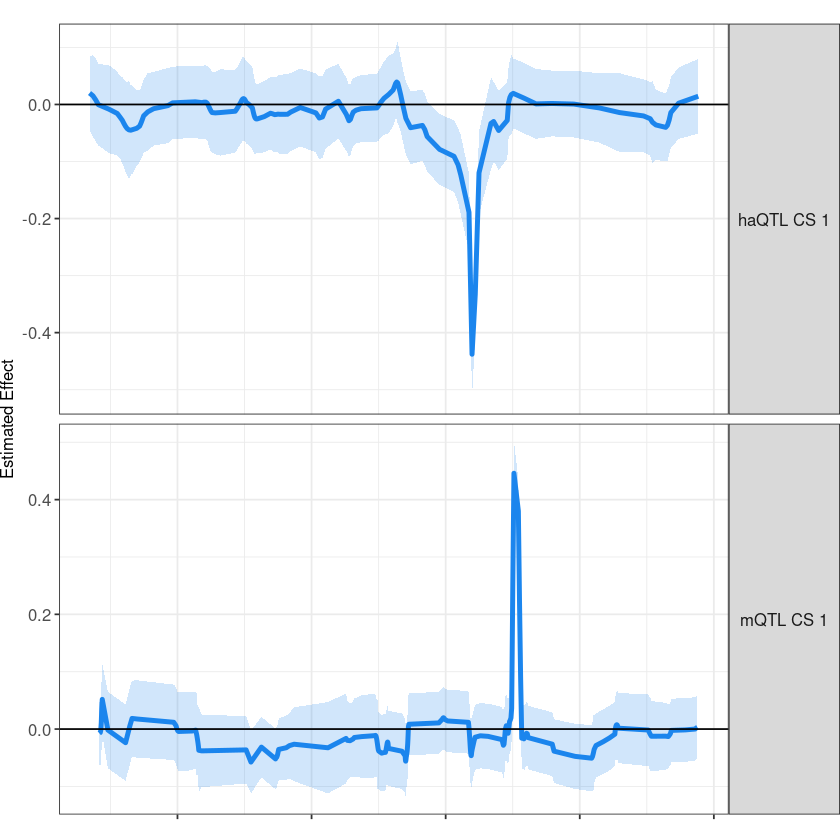

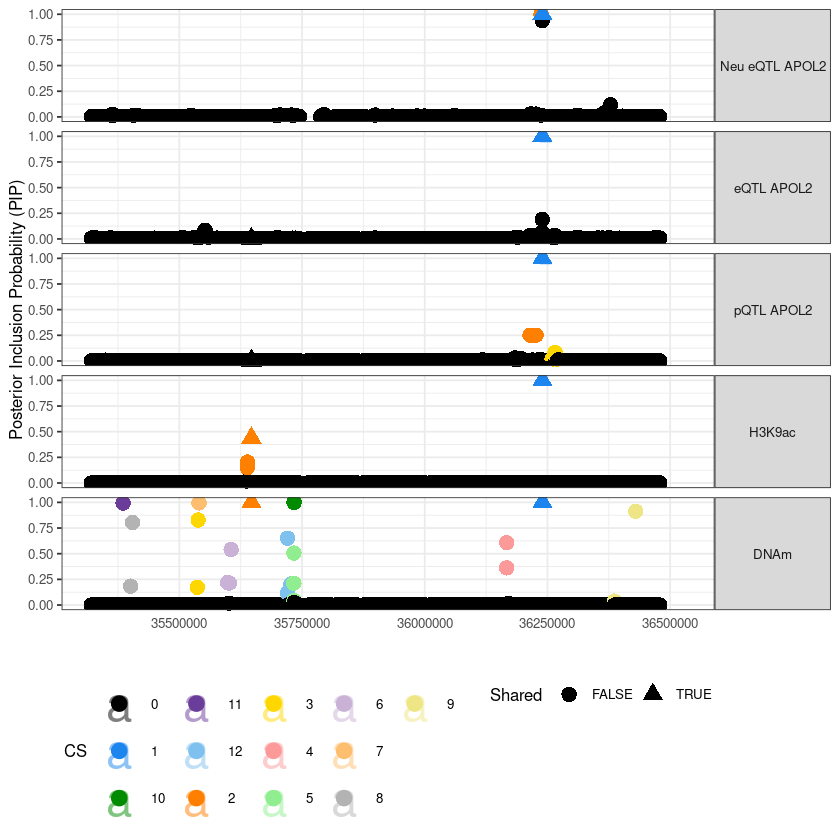

Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“Duplicated aesthetics after name standardisation: colour”
Warning message:
“Duplicated aesthetics after name standardisation: colour”


mapping: xintercept = 36480000 
geom_vline: na.rm = FALSE
stat_identity: na.rm = FALSE
position_identity 

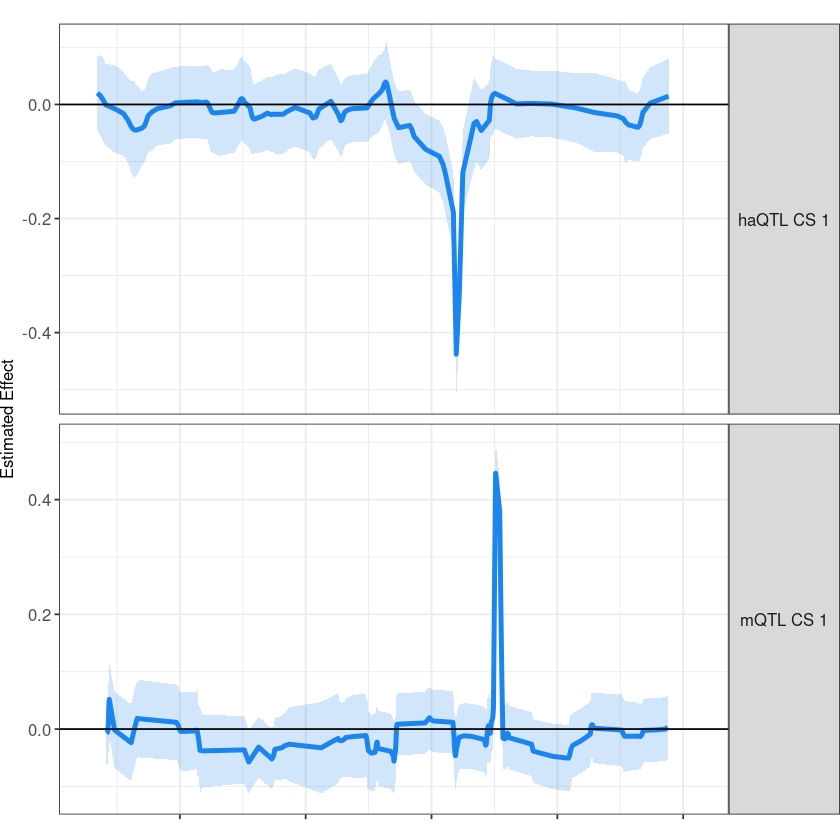

Scale for y is already present.
Adding another scale for y, which will replace the existing scale.


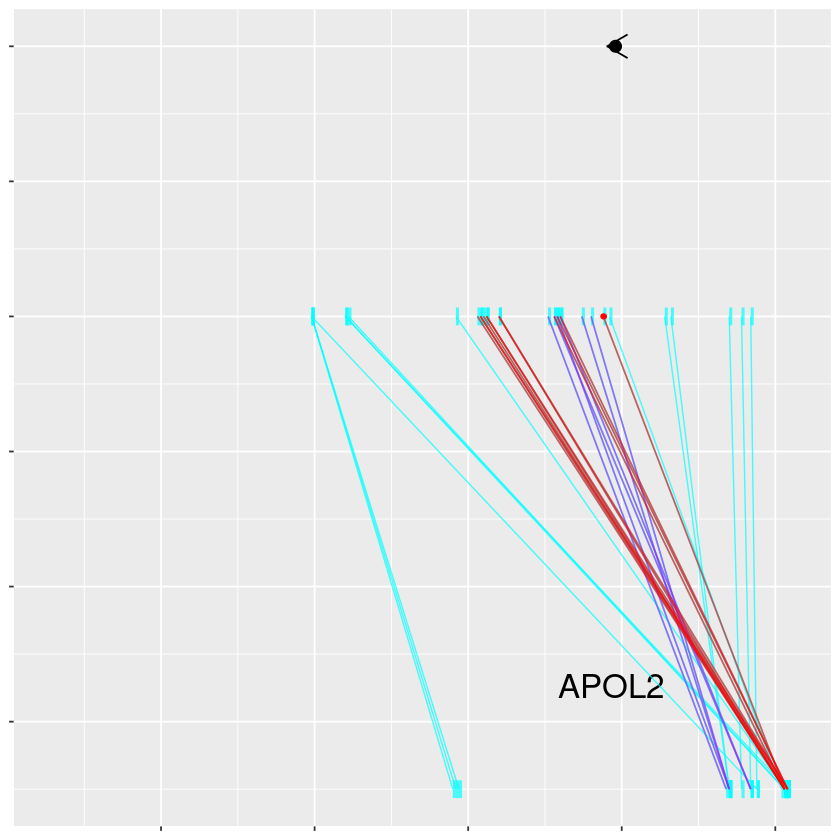

In [1]:
library("dplyr")
library("readr")
library("stringr")
library("purrr")
library("tidyr")
library("ggplot2")
library("cowplot")
library("ComplexUpset")
effect1411 = read_delim("../data/case_study_tad1411/4_tad1411effect_superfine.tsv")
gene_plot75  = read_delim("../data/case_study_tad1411/4_tad1411gene_info.tsv")%>%mutate(strand = strand%>%as.factor%>%as.numeric)
simul_tf=read_delim("../data/case_study_tad1411/4_tad1411_annotation_simul_tf","\t")
Neu_int = read_delim("../data/resource//Neu_hg38.Int.Nott.tsv")
Oli_int = read_delim("../data/resource//Oli_hg38.Int.Nott.tsv")
rbind(Neu_int%>%mutate(type = "Neu"),Oli_int%>%select(-`...1`)%>%mutate(type = "Oli"))-> annotation

gene_plot75 = gene_plot75%>%filter(gene_id %in% c("ENSG00000128335"))
chr_select = "chr22"
#gene_plot[4,] = gene_plot[3,]
gene_plot75$x_label <- (0.5*(gene_plot75$end-gene_plot75$start)+gene_plot75$start)
nn = 0.9

n = c(1,2,3,4)
color = color2 = c("black", "dodgerblue2", "#6A3D9A","#FF7F00","skyblue2","#6A3D9A",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")




#refine_effect_plot =  read_delim(paste(path,"4_1182_effect.tsv", sep=""))
refine_effect_plot<-  ggplot( effect1411  )+
  geom_line(aes(x = pos, y = mid,color = effect), size=1.4)+
  geom_ribbon(aes(x = pos,
                  y = mid,
                  ymin = low,
                  ymax = up,
                  fill = effect),
              alpha = 0.2)+
  ylab("Estimated Effect") +
  xlab("POS")+
  facet_grid(factor(type,levels =  c("haQTL_Effect_1",
                                     "mQTL_Effect_1"
                                     ),
                    labels =   c("haQTL CS 1",
                                 "mQTL CS 1")
  )~., scales = "free" )+
  scale_color_manual("Credible set",values = color2[n+1])+
  geom_hline(aes(yintercept = 0), color = "black")+
  scale_fill_manual("Credible set",values = color2[n+1])+
  theme_bw()+
  xlab("") +
  ylab("Estimated Effect")+
  theme(text = element_text(size = 10),
        legend.position="none")+
  theme(plot.margin=unit(c(5,0,0,0),"mm"),
        strip.text.y.right = element_text(angle = 0,
                                          size = 10),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size = 10)
  )


refine_effect_plot


refine_plot =read_delim("../data/case_study_tad1411/4_tad1411pip_superfine.tsv","\t")
plot_range = c(min(refine_plot$pos),max(refine_plot$pos))
plot_range[2] = 36530000
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"haQTL"))]<- "H3K9ac"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"mQTL"))]<- "DNAm"
refine_plot$molecular_trait_id  [ which(refine_plot$molecular_trait_id =="pQTL 22_APOL2_Q9BQE5" )]<- "pQTL APOL2"
refine_plot$molecular_trait_id  [ which(str_detect(refine_plot$molecular_trait_id,"Exc"))]<- "Neu eQTL APOL2"
refine_plot$molecular_trait_id <- factor(refine_plot$molecular_trait_id,level = c(level = c("Neu eQTL APOL2","Inh APOL2","eQTL APOL2","pQTL APOL2","H3K9ac","DNAm")))
refine_plot = refine_plot%>%filter(!is.na(molecular_trait_id))
color = color2 = c("black", "dodgerblue2","green4","#6A3D9A","skyblue2", "#FF7F00",
                   "gold1",  "#FB9A99", "palegreen2",
                   "#CAB2D6", "#FDBF6F", "gray70", "khaki2", "maroon", "orchid1",
                   "deeppink1", "blue1", "steelblue4", "darkturquoise", "green1",
                   "yellow4", "yellow3","darkorange4","brown","navyblue","#FF0000",
                   "darkgreen","#FFFF00","purple","#00FF00","pink","#0000FF",
                   "orange","#FF00FF","cyan","#00FFFF","#FFFFFF")
##### Change coloring of non-overlap CS
#refine_plot%>%mutate(new_CS = case_when(molecular_trait_id == "Oli TMEM131L" & new_CS == 2 ~  9,
#                                    molecular_trait_id == "H3K9ac" & new_CS == 2 ~  10,
#                                     molecular_trait_id == "DNAm" & !Shared & new_CS == 1 ~  11,
#                                    .default = new_CS 
#                                   ))-> refine_plot

#### Add sign annotation, see pseudobulk notebook for code to gather this info
#sign = 
# refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
#    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
#    filter(!molecular_trait_id%in% c("H3K9ac", "DNAm")) %>%ungroup%>%mutate(sign = c("-","-","-","+","-") )
#refine_plot = left_join(refine_plot,sign)
#

### Add sign annotation, see pseudobulk notebook for code to gather this info
sign = 
refine_plot%>%group_by(molecular_trait_id, new_CS)%>%
    summarize(pos = max(pos[which(y == max(y))]), y = max(y))%>%filter(new_CS != 0)%>%
    filter(molecular_trait_id%in% c("eQTL APOL2", "pQTL APOL2","Neu eQTL APOL2"),new_CS == 1) %>%ungroup%>%mutate(sign = c("-") )

refine_plot = left_join(refine_plot,sign)


table(refine_plot$molecular_trait_id )
refine_plot  <-  ggplot2::ggplot(refine_plot,aes(y = y,
                                                 x = pos,
                                                 col =  as.factor(new_CS))) +
  geom_text(alpha = 0.5, aes(x =pos + 7000, y = y ,color =  as.factor(new_CS), label = sign ) ,data = sign, size = 10)+
  facet_grid(molecular_trait_id ~.)+
  geom_point(size = 4,aes(
                                                 shape = Shared )) +
  scale_color_manual("CS",values = color) +
  theme_bw()+
  theme(axis.ticks.x = element_blank()) +
  ylab("Posterior Inclusion Probability (PIP)")+
  xlim(plot_range)+
  theme(axis.ticks.x = element_blank() ) +
  theme(strip.text.y.right = element_text(angle = 0))+
  xlab("") +
  theme(text = element_text(size = 10),legend.position = "bottom")
refine_plot


refine_effect_plot+
  xlim(plot_range)
gene_plot_plot <-ggplot(gene_plot75,aes()) +
  geom_segment( aes(x = start,xend = end, y = (nn-strand/100), yend =(nn-strand/100) ) ,
                arrow = arrow(length = unit(0.5, "cm")) )+
  geom_text(aes(x = x_label,y = (nn-0.05-strand/100), label = gene_name, vjust=-1),
            size = 7)+
  ylab("")+
  xlab("")+
  theme(legend.position="none")+
  theme(text = element_blank())+
  xlim(plot_range)+
  geom_point(aes(x = start, y = (nn-strand/100)),
             color = "black",size = 3  )+        
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start1, end = end1, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(color = type,x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%select(type,start = start2,start1, end = end2, chr = chr1)%>%filter(chr == chr_select, start > plot_range[[1]],start < plot_range[[2]],type =="Neu"  )  ) +
    geom_segment(color = "cyan", aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.7,size = 0.4, color  = "purple",  annotation%>%select(type, start2,start1,  chr = chr1)%>%filter(chr == chr_select, start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )  ) +
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.87, yend =  0.87),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu"  )%>%rename(start = start1, end = end1, chr = chr1)  ) +
    #geom_segment( color = "cyan",aes(x = start,xend = end, y = 0.835, yend =  0.835),alpha = 0.7,size = 5, data = annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209 , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu")%>%rename(start = start2, end = end2, chr = chr1)  ) +
    geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 < 36500000 )%>%rename( end = end2))+
    geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  simul_tf%>%count(start1,end1,start2,end2)%>%filter(start2 > 36500000 )%>%rename( end = end2)  )+

    #geom_segment( color = "purple",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "purple",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu", start2 < 36500000  )%>%rename( end = end2, chr = chr1)  ) +
    #geom_segment( color = "red",aes(x = start1,xend = start2, y = 0.87 , yend = 0.835 ),alpha = 0.6,size = 0.5, color  = "red",  annotation%>%filter(chr1 == chr_select,start1 > 36000000 , start1 < 36226209  , start1 > plot_range[[1]],start1 < plot_range[[2]],type =="Neu",start2 > 36500000  )%>%rename( end = end2, chr = chr1)  ) + 
geom_point( color = "red",aes(x = 36219878, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36221298, y = 0.87  ),alpha = 1,size = 1 )#+
#geom_point( color = "red",aes(x = 36505275, y = 0.87  ),alpha = 1,size = 1 ) +  geom_point( color = "red",aes(x = 36529241, y = 0.87  ),alpha = 1,size = 1 )+

    geom_vline( color = "black",aes(xintercept = 36480000 ),alpha = 1,size = 1 ) 

gene_plot_plot







cowplot::plot_grid(plotlist = list(refine_effect_plot+theme(strip.text.y.right = element_text(angle = 0,size = 20),axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"))+
                                     xlim(plot_range)+
                                     theme(text = element_text(size = 30)),#microglia_enhancer_activity,#+facet_grid(TargetGene_name~., scales = "free"),
                                   gene_plot_plot+
                                     theme_bw()+
                                     theme(axis.text.x = element_blank(),
                                           axis.text.y = element_blank()) +
                                     theme(strip.text.y.right = element_text(angle = 0))+
                                     xlab("")+
                                     theme(text = element_text(size = 20)),
                                   refine_plot+
                                     theme_bw()+
                                     theme(axis.ticks.x = element_blank()) +#scale_x_continuous(breaks=seq(35000000,36500000,length.out =  9))+
                                     theme(strip.text.y.right = element_text(angle = 0,size = 20))+
                                     xlab("") +ylim(c(0,1))+theme(text = element_text(size = 20),axis.text.x = element_text(size = 30), axis.text.y = element_text(size = 18), 
                                           panel.spacing=unit(0.7, "lines"),legend.position = "none")+scale_y_continuous(breaks = c(0,0.5,1))
                                   
) ,
ncol = 1,
align = "v",
axis = "tlbr",
rel_heights = c(5,1.5,6),labels  = c("A","B","C"),label_size = 25
)-> result_plot



In [2]:
result_plot%>%ggsave(filename = "../plot/casestudy_1411.pdf",width = 20, height = 15, device = "pdf")
result_plot%>%ggsave(filename = "../plot/casestudy_1411.png",width = 20, height = 15, device = "png")